# Load Data

In [47]:
from naivebayes import *

In [48]:
training_image_data = read_image_data("./trainingimages.txt")
training_label_data = read_label_data("./traininglabels.txt")
testing_image_data = read_image_data("./testimages.txt")
testing_label_data = read_label_data("./testlabels.txt")

labels = [str(item) for item in range(0, 10)]
features = [0, 1, 2, 3] 
eps = 3/10 # threshold for what to conisder a "significant" amount of pixels in a given region


# Feature Construction

Each image is partitioned into four regions: $f_1,f_2,f_3,f_4$. 

$ f_i = 
\begin{cases}
1 \space\space\text{if density of pixels >= }\epsilon\\
0 \space\space\text{otherwise}
\end{cases}$


In [3]:

#make feature vectors
train = make_feature_vector(training_image_data, training_label_data,5000,eps)
test = make_feature_vector(testing_image_data, testing_label_data,1000,eps)

# Calculating the priors

In [4]:
#class priors (eps=3/10)
sanity_check = 0.0
for label in labels:
    p = prior(label,train)
    sanity_check += p
    print(p)
    
print("sum: " + str(sanity_check))

0.0958
0.1126
0.0976
0.0986
0.107
0.0868
0.1002
0.11
0.0924
0.099
sum: 0.9999999999999999


# Calculating the Evidence

In [5]:
#evidence priors (n=4 features, eps=3/10)
sanity_check = 0.0
for feature in features:
    f = sum([1 for item in train if item[feature] == True]) / len(train)
    sanity_check += f
    print(f)
    
print("sum: " + str(sanity_check))

0.5848
0.5786
0.1634
0.1532
sum: 1.48


# A Function to Calcluate Conditional Probability

In [6]:
# calculate the probability that an event=value conditioned on a specified probability space
# used to find both unconditional probabilities (prob_space = omega) and conditional probabilities (prob_space = evidence)
def P(event,value,prob_space):
    return sum([1 for item in prob_space if item[event] == value]) / len(prob_space)
    

# Example

In [7]:
# calculate join dist. using Naive Bayes assumption (all features independent)
a = P(0,True,[item for item in train if item[4] == '1'])
b = P(1,True,[item for item in train if item[4] == '1'])
c = P(2,False,[item for item in train if item[4] == '1'])
d = P(3,False,[item for item in train if item[4] == '1'])

a * b * c * d

0.17721826028103388

# Calculate Posteriors

In [8]:
# calculate P(C|F) 
def posterior(C,f1,f2,f3,f4,train):
    return (P(0,f1,[item for item in train if item[4] == C]) * \
    P(1,f2,[item for item in train if item[4] == C]) * \
    P(2,f3,[item for item in train if item[4] == C]) * \
    P(3,f4,[item for item in train if item[4] == C]) * \
    P(4,C,train)) 



    

# Prediction Function

In [9]:
#predict the label for a given problem instance, given the training data
#X = [f1,f2,f3,f4]
def predict(X):
    index = 0
    count = 0
    max_prob = 0.0
    for label in labels:
        prob = posterior(label,X[0],X[1],X[2],X[3],train)
        if max_prob < prob:
            max_prob = prob
            count += 1
        index += 1
    return str(count)

    



# A Function for Calculating Accuracy

In [10]:
# How accurate? 
def evaluate(test,N):
    n_correct = 0
    for item in test:
        if predict(item) == item[4]:
            n_correct += 1

    pct_correct = n_correct / N
    return pct_correct
    


# Train/Test

### <i>A Test in Patience</i> 

In [51]:
import random
import numpy as np
import time

N = 5 # number of trials
size = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000] #size of dataset (by 10%s)

accuracy = list()
mean = list()
std = list()


#record training time
tic = time.clock()
X_train = make_feature_vector(training_image_data,training_label_data,5000,eps) #train
toc = time.clock()
print("Training time: " + str(toc-tic) + " sec.")

X_test = make_feature_vector(testing_image_data, testing_label_data,1000,eps)  #test

for s in size:
    print("Using " + str(round( (s / len(X_train)) * 100 )) + "% training data (" + str(N) + " trials)...")
    for i in range(0,N):
        print(f"t={i}")
        train = random.sample(X_train,s) # sample 
        accuracy.append(evaluate(X_test,s)) #test
    mean.append(np.average(accuracy)) # record accuracy 
    std.append(np.std(accuracy))    # std accuracy
    accuracy.clear()
    
    

    


Training time: 0.7382729999999356 sec.
Using 10% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 20% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 30% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 40% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 50% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 60% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 70% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 80% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 90% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4
Using 100% training data (5 trials)...
t=0
t=1
t=2
t=3
t=4


# Mean Accuracy and Standard Deviation
### <i>A Lesson in Humility</i>

In [52]:
print(f"mean(acc),std(acc) ({N} trials)")
for (m,s) in zip(mean,std):
    print(str(round(m,2)*100) + "%" + "  " + str(round(s,6)))



mean(acc),std(acc) (5 trials)
21.0%  0.041058
9.0%  0.011883
6.0%  0.008964
4.0%  0.01294
4.0%  0.001686
3.0%  0.00124
3.0%  0.004045
2.0%  0.0012
2.0%  0.000259
2.0%  0.0


# The Relationship Between Accuracy and Threshold

In [54]:
# how does accuracy vary with threshold?

accuracy = list()
thresholds = [1/10,2/10,3/10,4/10,5/10,7/10,8/10,9/10]
for t in thresholds:
    train = make_feature_vector(training_image_data, training_label_data,5000,t)
    test = make_feature_vector(testing_image_data, testing_label_data,1000,t)
    accuracy.append(evaluate(test,1000))

print(accuracy)   

[0.103, 0.087, 0.09, 0.087, 0.102, 0.103, 0.103, 0.103]


It appears that $[1/10,5/10,6/10,7/10,8/10,9/10]$ are the optimal thresholds. For some reason, $[2/10,3/10,4/10]$ cause a slight dip in accuracy.

# Why is the accuracy so bad?

### A Post-Mortem Analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.DataFrame(make_feature_vector(training_image_data,training_label_data,5000,None),columns=['f1','f2','f3','f4','label'])
data.head()

,f1,f2,f3,f4,label
0,136,134,89,87,5
1,139,139,104,104,0
2,96,79,86,73,4
3,85,85,68,68,1
4,125,125,84,84,9


In [39]:
data.f1.describe()


count    5000.000000
mean      122.450200
std        32.386332
min         0.000000
25%       101.000000
50%       123.000000
75%       144.000000
max       239.000000
Name: f1, dtype: float64

In [40]:
data.f2.describe()


count    5000.000000
mean      121.847000
std        32.072601
min         0.000000
25%       101.000000
50%       123.000000
75%       143.000000
max       235.000000
Name: f2, dtype: float64

In [41]:
data.f3.describe()


count    5000.00000
mean       91.21440
std        26.52625
min         0.00000
25%        72.00000
50%        92.00000
75%       110.00000
max       197.00000
Name: f3, dtype: float64

In [42]:

data.f4.describe()

count    5000.000000
mean       90.771400
std        26.241457
min         0.000000
25%        71.000000
50%        91.000000
75%       109.000000
max       194.000000
Name: f4, dtype: float64

/Users/Duncan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


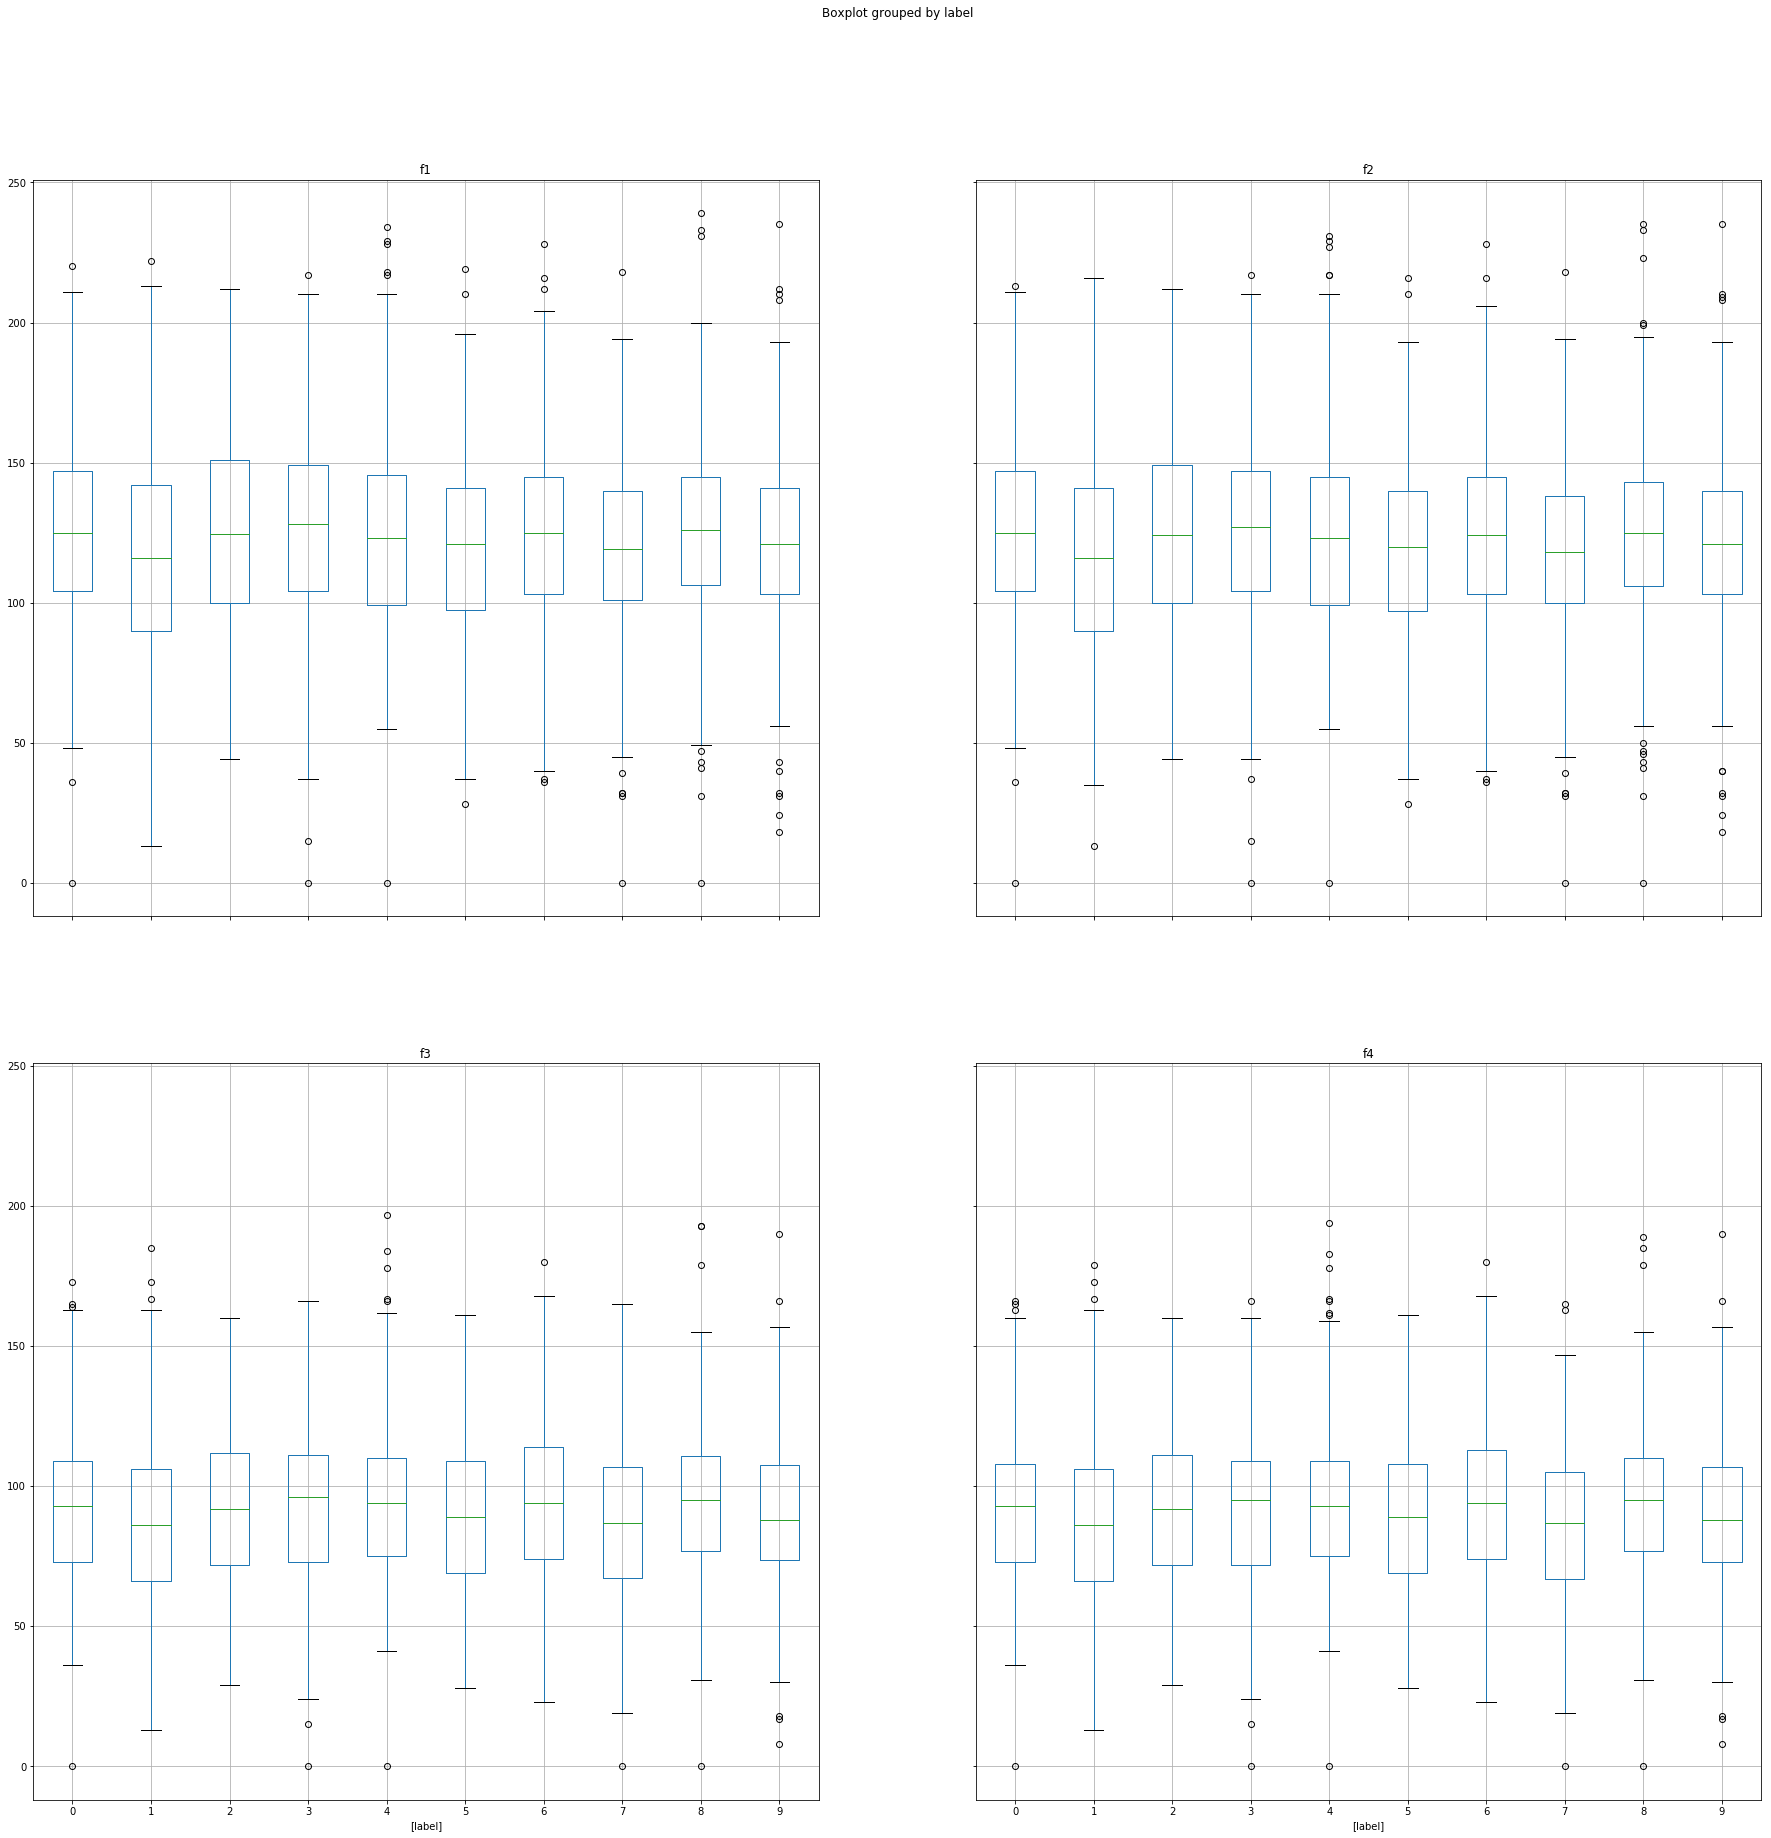

In [43]:
plt.figure()

data.boxplot(by='label',figsize=(30,30))

plt.show()
plt.close()

The features lack significant discriminating ability with respect to the labels. It's likely that more features are necessary to increase accuracy. 

# Discussion



The naive bayes classifier (NB) is a type of linear classifier. A linear classifier is a function that maps a feature vector to two or more catagorical "classifications". NB is a probabilistic linear classifier; it uses probability to decide which class a problem instance belongs to. The chosen class is that with the highest probability. 
As its name suggests, NB uses Baye's Theorem, and it's "naive" in the sense that it operates on the assumption that all features of the data are indepedent (mutually exclusive). This naive approach is adopted for the sake of simplifying implementation and reducing computation time; 
as such, the NB implementation is fairly straightforward. 
For a given problem instance, we want probability that it belongs to a class C given its vector of features X, i.e. the posterior probability. To calculate this, we must estimate the probability distribution for C, i.e. the prior, and the probability distrubtion for the features X, given C, i.e. the liklihood. The prior distribution is straightforward to estimate: simply count the number of training instances with class C = k, and divide it by the total number of training instances. The liklihood distribution is estimated by taking the product of the liklihoods of each feature, i.e. the probability of feature x_i in X conditioned on class C_k. For each class C, we calculate the product of the liklihood and the prior, and choose the class with the highest probability. 

Perhaps the most important part of machine learning is creating the feature vectors. NB is simple to implement, but only as effective as the quality (descriptiveness, discrimination) of the feature vectors. The feature vectors are, to the best of my knowledge, the reason that my implementation of NB performs so poorly (acc ~= 5%). To clarify, my algorithm makes use of four features corresponding to partitions of the image. For each region, the ratio of the number of non-whitespace characters to whitespace characters is compared against a predefined threshold. If the ratio is above the threshold, the feature is assigned 1, and 0 otherwise.
A 5% accuracy rate may reflect the fact that four partitions is insufficient; maybe eight would have done better; or sixteen. More testing is necessary.




